In [31]:
import numpy as np

# 이상치 미존재
x1 = np.array([10, 9, 3, 2])
y1 = np.array([90, 80, 50, 30])

# 이상치 존재
x2 = np.array([10, 9, 3, 2, 11])
y2 = np.array([90, 80, 50, 30,40])

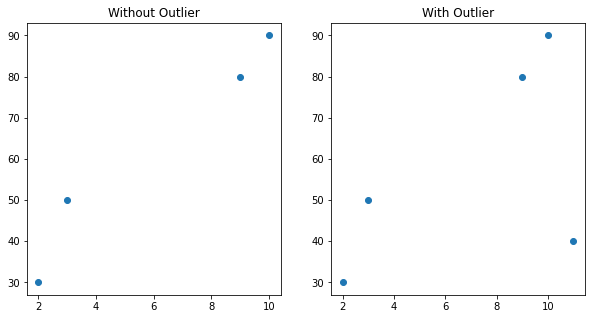

In [32]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.scatter(x1, y1)
plt.title('Without Outlier')

plt.subplot(1, 2, 2)
plt.scatter(x2, y2)
plt.title('With Outlier')
plt.show()

In [33]:
def OLS(x, y):
    w = np.sum((x-x.mean()) * (y-y.mean())) / np.sum((x-x.mean())**2)
    b = y.mean() - w * x.mean()
    return w, b

In [34]:
w1, b1 = OLS(x1, y1)
w1, b1

(6.6, 22.900000000000006)

In [35]:
w2, b2 = OLS(x2, y2)
w2, b2

(3.4285714285714284, 34.0)

In [36]:
x1_pred = x1 * w1 + b1
x2_pred = x2 * w2 + b2

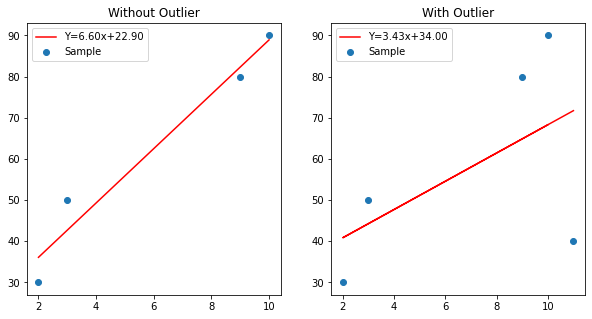

In [37]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.scatter(x1, y1, label='Sample')
plt.plot(x1, x1_pred, c='red', label=f'Y={w1:.2f}x+{b1:.2f}')
plt.legend()
plt.title('Without Outlier')

plt.subplot(1, 2, 2)
plt.scatter(x2, y2, label='Sample')
plt.plot(x2, x2_pred, c='red', label=f'Y={w2:.2f}x+{b2:.2f}')
plt.title('With Outlier')
plt.legend()
plt.show()

In [38]:
from sklearn.linear_model import LinearRegression
model1 = LinearRegression().fit(x1.reshape(-1, 1), y1)
model1.coef_, model1.intercept_

(array([6.6]), 22.899999999999984)

In [39]:
model2 = LinearRegression().fit(x2.reshape(-1, 1), y2)
model2.coef_, model2.intercept_

(array([3.42857143]), 33.99999999999999)

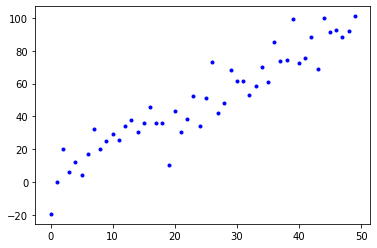

In [40]:
import random
import numpy as np
import matplotlib.pylab as plt

m = 50 #sample count
X = np.arange(m)
y = X  * 2 # W = 2, b=0(bias 생략) 
y = y + 10 * np.random.randn(m) # adding noise

plt.plot(X, y, 'b.')

In [41]:
# w_range = np.arange(0.1, 4.1, 0.1)
# costs = []
# for w in w_range:
#     h = w * X
#     cost = 1 / 50 * np.sum( (h-Y) ** 2)
#     costs.append(cost)
# plt.plot(w_range, costs, 'r.')

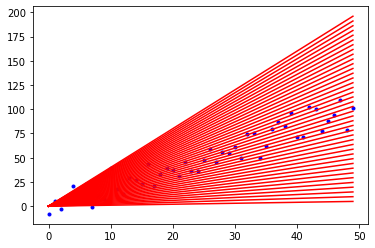

In [42]:
import numpy as np
import matplotlib.pyplot as plt

X = np.arange(50)
Y = (2 * X) + 10 * np.random.randn(50)
plt.plot(X, Y, 'b.')

w_range = np.arange(0.1, 4.1, 0.1)
for w in w_range:
    h = w * X
    plt.plot(X, h, 'r-')    

#### Batch Gradient Descent
* 전체 샘플에 대해서 경사 하강법을 이용해서 예측

initial W 0.25427784919418706
epoch: 0  cost: 2705.0237247988302  gradient: -2910.0422224468844  W: 0.3997799603165313
epoch: 20  cost: 176.3368306417864  gradient: -539.0476052443983  W: 1.7475225097300533
epoch: 40  cost: 89.5706023749815  gradient: -99.8515823854255  W: 1.99717434919253
epoch: 60  cost: 86.59341354822605  gradient: -18.49621148090109  W: 2.0434191167663665
epoch: 80  cost: 86.49125798047561  gradient: -3.426183451210794  W: 2.051985360590417
epoch: 100  cost: 86.4877527409259  gradient: -0.6346560782727011  W: 2.0535721462334817
epoch: 120  cost: 86.48763246648011  gradient: -0.11756181285228479  W: 2.053866077707855
epoch: 140  cost: 86.48762833953181  gradient: -0.021776802136880064  W: 2.0539205247038965
epoch: 160  cost: 86.48762819792485  gradient: -0.004033870350820621  W: 2.053930610304237
epoch: 180  cost: 86.48762819306589  gradient: -0.0007472221997625183  W: 2.0539324785309834
epoch: 200  cost: 86.48762819289918  gradient: -0.00013841322829421187  W: 2.05

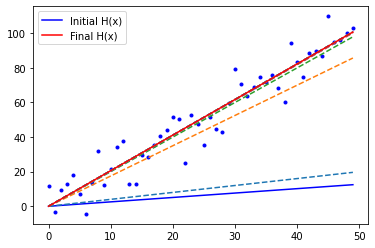

In [43]:
import random
import numpy as np
import matplotlib.pylab as plt

m = 50 #sample count
X = X #np.arange(m)
y = X  * 2 # W = 2, b=0(bias 생략) 
y = y + 10 * np.random.randn(m) # adding noise

plt.plot(X, y, 'b.')


W = np.random.rand() # 가중치
plt.plot(X, W*X, 'b', label='Initial H(x)') #파란색 초기값
print('initial W', W) #초기 가중치

learning_rate = 0.00005 # 가중치의 증가단위
suspend = 0.00001 # 현재기울기와 직전기울기 차이값
old_g = None # 직전 기울기
epochs = 1000 # 반복횟수
for epoch in range(epochs):
    hypothesis = W * X  # 가설식
    loss = hypothesis - y  # 잔차
    cost = 1/m * np.sum(loss**2) # 잔차의제곱의 평균
    gradient =  2/m * np.sum(loss * X) # 잔차의 기울기
    # 직전기울기가 존재하고 현재기울기과 직전기울기간 차이가 suspend보다 작으면 반복중지
    if old_g is not None and abs(gradient - old_g) < suspend:
        print('suspended:', epoch)
        break
    old_g = gradient # 현재기울기를 이전 기울기에 저장
    W = W - learning_rate * gradient  # 현재가중치에 가중치증가*기울기를 누적
    if epoch %20 == 0: # 계산 20번마다 현재값 출력
        print('epoch:',epoch,' cost:',cost,' gradient:',gradient, ' W:', W)
        plt.plot(X, W*X, '--') #
print('Final W:', W) # 1000번 반복종료 또는 중간 종료시
plt.plot(X, W*X, 'r', label='Final H(x)') #최종 가중치룰 직선으로 그려봄
plt.legend()
plt.show()

#### Stochastic Gradient Descent


initial W 0.07732686001568745
epoch: 0 cost: 7.384608991875663e+24  gradient: 201913222257352.84  W: -1945985858907.7954 learn_rate: 0.01
epoch: 5 cost: 1.347711315989151e+64  gradient: -6.701979016625346e+33  W: 4.3556428678620084e+30 learn_rate: 0.00125
epoch: 10 cost: 6.76234680470508e+53  gradient: -5.608299872336024e+28  W: 1.3273169288500804e+25 learn_rate: 0.0006666666666666666
epoch: 15 cost: 79.1013626186069  gradient: -180.59376954988565  W: 2.0070721315091253 learn_rate: 0.00045454545454545455
epoch: 20 cost: 53.50172643630545  gradient: -19.43487289256768  W: 2.181771274587787 learn_rate: 0.0003448275862068965
epoch: 25 cost: 202.16589132863942  gradient: 650.7169222011756  W: 2.0213446117757585 learn_rate: 0.0002777777777777778
epoch: 30 cost: 108.74742810096255  gradient: 35.48768469906406  W: 2.05707299623263 learn_rate: 0.00023255813953488373
epoch: 35 cost: 8.852466260102924  gradient: -48.34259991099657  W: 1.9936064706187 learn_rate: 0.0002
epoch: 40 cost: 48.2845434

(0.0, 50.0, 0.0, 100.0)

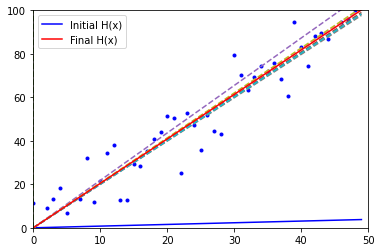

In [44]:
plt.plot(X, y, 'b.')

W = np.random.rand()
plt.plot(X, W*X, 'b', label='Initial H(x)')
print('initial W', W)

t0, t1 = 1, 100
epochs = 50
batches = 5
for epoch in range(epochs):
    for i in range(int(m/batches)):
        random_i = np.random.randint(0,m, (batches,))
        xi = X[random_i]
        yi = y[random_i]
        h = W*xi
        cost = 1/batches* np.sum((h-yi)**2)
        gradient = 2/batches* np.sum((h-yi) * xi)
        learning_rate = t0/(t1 + (epoch * (m + i*10)))
        #learning_rate = 0.0005
        W = W - learning_rate * gradient
    if epoch %5 ==0:
        print('epoch:',epoch, 'cost:', cost,' gradient:',gradient, ' W:', W, 'learn_rate:', learning_rate)
        plt.plot(X, W*X, '--')
print('Final W:', W)
plt.plot(X, W*X, 'r', label='Final H(x)')
plt.legend()
plt.axis([0, 50, 0, 100])

ValueError: x and y must have same first dimension, but have shapes (40,) and (0,)

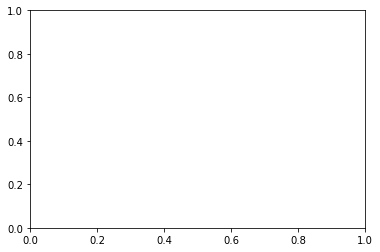

In [45]:
plt.plot(w_range, costs, 'r.')
for w, cost in zip(w_range, costs):
    h = w * X
    gradient = 2 / 50 * np.sum( (h-Y) * X)
    plt.plot(w_range, gradient*(w_range-w)+cost)
    plt.axis([0, 4, 0, 3000])
plt.show() 

In [46]:
for w, cost in zip(w_range, costs):
    plt.plot(w_range, costs, 'r.')
    h = w * X
    gradient = 2 / 50 * np.sum( (h-Y) * X)
    plt.plot(w_range, gradient*(w_range-w)+cost)
    plt.axis([0, 4, 0, 3000])
    plt.show() 

# 보스톤 주택가격 예측

In [47]:
import pandas as pd
from sklearn.datasets import load_boston
boston = load_boston()
df = pd.DataFrame(boston['data'], columns=boston['feature_names'])
df['PRICE'] = boston['target']
df.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [48]:
from sklearn.model_selection import train_test_split
x = df.loc[:, 'CRIM':'LSTAT']
y = df.loc[:, 'PRICE']
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((379, 13), (127, 13), (379,), (127,))

In [49]:
from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(x_train, y_train)
model.score(x_train, y_train), model.score(x_test, y_test)

(0.7697699488741149, 0.6354638433202129)

# PolynormialFeatures

In [50]:
from sklearn.preprocessing import PolynomialFeatures
import numpy as np
P = PolynomialFeatures(degree=2, include_bias=True)
x = np.arange(5).reshape(-1, 1)
pd.DataFrame(P.fit_transform(x), columns=P.get_feature_names())

,1,x0,x0^2
0,1.0,0.0,0.0
1,1.0,1.0,1.0
2,1.0,2.0,4.0
3,1.0,3.0,9.0
4,1.0,4.0,16.0


In [51]:
from sklearn.preprocessing import PolynomialFeatures
P = PolynomialFeatures(degree=2)
x = np.arange(10).reshape(-1, 2)
pd.DataFrame(P.fit_transform(x), columns=P.get_feature_names())

,1,x0,x1,x0^2,x0 x1,x1^2
0,1.0,0.0,1.0,0.0,0.0,1.0
1,1.0,2.0,3.0,4.0,6.0,9.0
2,1.0,4.0,5.0,16.0,20.0,25.0
3,1.0,6.0,7.0,36.0,42.0,49.0
4,1.0,8.0,9.0,64.0,72.0,81.0


In [52]:
P = PolynomialFeatures(degree=2, include_bias=False)
x = np.arange(10).reshape(-1, 2)
pd.DataFrame(P.fit_transform(x), columns=P.get_feature_names())

,x0,x1,x0^2,x0 x1,x1^2
0,0.0,1.0,0.0,0.0,1.0
1,2.0,3.0,4.0,6.0,9.0
2,4.0,5.0,16.0,20.0,25.0
3,6.0,7.0,36.0,42.0,49.0
4,8.0,9.0,64.0,72.0,81.0


In [53]:
P = PolynomialFeatures(degree=2, include_bias=False)
x_poly = P.fit_transform(df.loc[:, 'CRIM':'LSTAT'])
x_train, x_test, y_train, y_test = train_test_split(x_poly, y, random_state=0)
df.loc[:, 'CRIM':'LSTAT'].shape, x_poly.shape

((506, 13), (506, 104))

In [54]:
model = LinearRegression().fit(x_train, y_train)
model.score(x_train, y_train), model.score(x_test, y_test)

(0.9520519609032728, 0.607472195968976)

In [55]:
P = PolynomialFeatures(degree=3, include_bias=False)
x_poly = P.fit_transform(df.loc[:, 'CRIM':'LSTAT'])
x_train, x_test, y_train, y_test = train_test_split(x_poly, y, random_state=0)
model = LinearRegression().fit(x_train, y_train)
model.score(x_train, y_train), model.score(x_test, y_test)

(1.0, -9443.834174657462)

In [56]:
P = PolynomialFeatures(degree=5, include_bias=False)
x_poly = P.fit_transform(df.loc[:, 'CRIM':'LSTAT'])
x_train, x_test, y_train, y_test = train_test_split(x_poly, y, random_state=0)
model = LinearRegression().fit(x_train, y_train)
model.score(x_train, y_train), model.score(x_test, y_test)

(1.0, -135.30506302850992)

### 다항 회귀 시각화

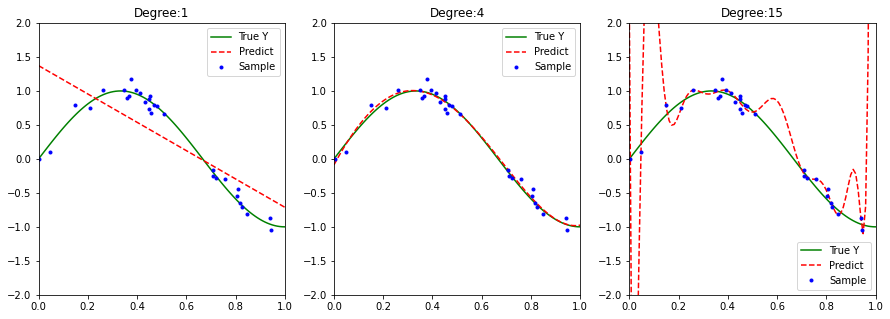

In [57]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

def sin(X):
    return np.sin(1.5 * np.pi * X)

m = 30
X = np.sort(np.random.rand(m))
y = sin(X) + np.random.randn(m) * 0.1

degrees = (1, 4, 15)
plt.figure(figsize=(15,5))

for i, degree  in enumerate(degrees):
    polynomial = PolynomialFeatures(degree=degree)
    lr = LinearRegression()
    pipe = Pipeline([('polynomial', polynomial), ('linear_regression', lr)])
    pipe.fit(X.reshape(-1,1), y)
    
    X_test = np.linspace(0,1, 100)
    plt.subplot(1, len(degrees), i+1)
    plt.plot(X_test, sin(X_test), 'g-', label='True Y')
    plt.plot(X_test, pipe.predict(X_test[:, np.newaxis]), 'r--', label='Predict')
    plt.plot(X, y, 'b.', label='Sample')
    plt.xlim((0,1)); plt.ylim((-2,2))
    plt.legend()
    plt.title(f"Degree:{degree}")
    
plt.show()

# s111 파이프라인 구축및 시각화 결과

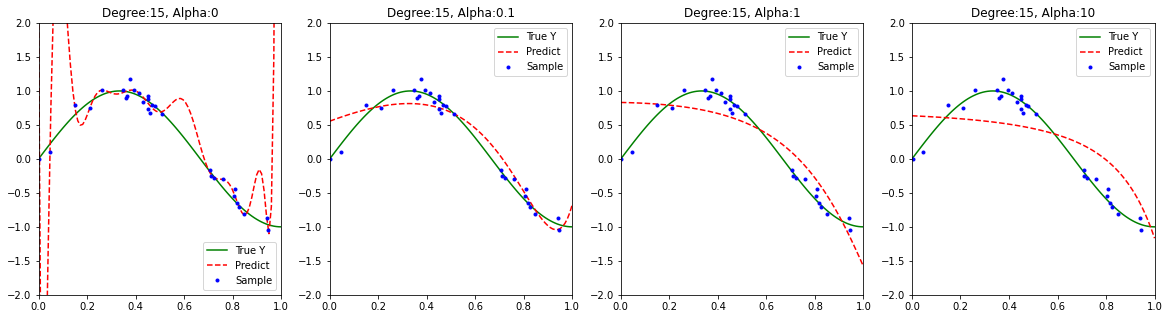

In [58]:
from sklearn.linear_model import Ridge

alphas = (0, 0.1, 1, 10)
plt.figure(figsize=(20, 5))

for i, alpha  in enumerate(alphas):
    polynomial = PolynomialFeatures(degree=15)
    ridge = Ridge(alpha=alpha)
    pipe = Pipeline([('polynomial', polynomial), ('ridge', ridge)])
    pipe.fit(X.reshape(-1,1), y)
    
    X_test = np.linspace(0,1, 100)
    plt.subplot(1, len(alphas), i+1)
    plt.plot(X_test, sin(X_test), 'g-', label='True Y')
    plt.plot(X_test, pipe.predict(X_test[:, np.newaxis]),
             'r--', label='Predict')
    plt.plot(X, y, 'b.', label='Sample')
    plt.xlim((0,1)); plt.ylim((-2,2))
    plt.legend()
    plt.title(f"Degree:15, Alpha:{alpha}")
    
plt.show()

# s116 보스톤 주택가격 예측

In [59]:
from sklearn.preprocessing import MinMaxScaler
P = PolynomialFeatures(degree=3, include_bias=False)
x_scaled = MinMaxScaler().fit_transform(df.loc[:, 'CRIM':'LSTAT'])
y = df.loc[:, 'PRICE']
x_poly = P.fit_transform(x_scaled)
x_train, x_test, y_train, y_test = train_test_split(x_poly, y, random_state=0)

# 모델및 학습평가

In [60]:
from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(x_train, y_train)
model.score(x_train, y_train), model.score(x_test, y_test)

(1.0, -238.8235319137529)

In [61]:
from sklearn.linear_model import Ridge
model = Ridge(alpha=1).fit(x_train, y_train)
model.score(x_train, y_train), model.score(x_test, y_test)

(0.9242749146283598, 0.7865342899841115)

# 규제 강도에 따른 성능비교

In [62]:
ridge01 = Ridge(alpha=0.1).fit(x_train, y_train)
ridge01.score(x_train, y_train), ridge01.score(x_test, y_test)

(0.9537155397034655, 0.790557043211024)

In [63]:
ridge10 = Ridge(alpha=10).fit(x_train, y_train)
ridge10.score(x_train, y_train), ridge10.score(x_test, y_test)

(0.8555501939781199, 0.7230747746713164)

# L2 규제효과

In [64]:
ridge01 = Ridge(alpha=0.1).fit(boston['data'], boston['target'])
ridge01_coef = pd.Series(ridge01.coef_, index=boston['feature_names'])

ridge1 = Ridge(alpha=1).fit(boston['data'], boston['target'])
ridge1_coef = pd.Series(ridge1.coef_, index=boston['feature_names'])

ridge10 = Ridge(alpha=10).fit(boston['data'], boston['target'])
ridge10_coef = pd.Series(ridge10.coef_, index=boston['feature_names'])

# 규제강도에 따른 가중치 값을 시각화

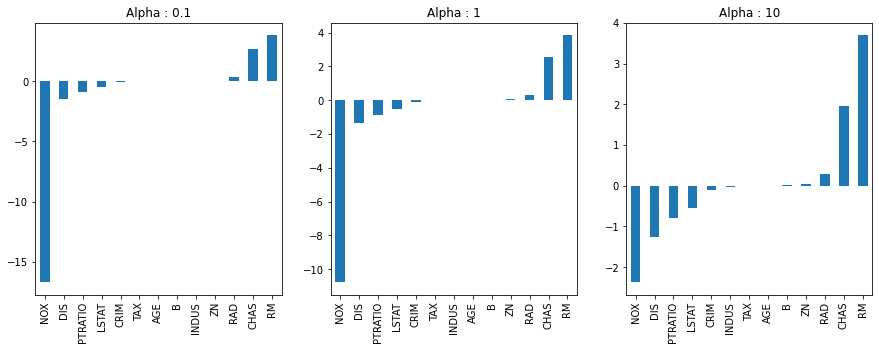

In [65]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
ridge01_coef.sort_values().plot(kind='bar')
plt.title('Alpha : 0.1')
plt.subplot(1, 3, 2)
ridge1_coef.sort_values().plot(kind='bar')
plt.title('Alpha : 1')
plt.subplot(1, 3, 3)
ridge10_coef.sort_values().plot(kind='bar')
plt.title('Alpha : 10')
plt.show()

# Lasso Regression

In [66]:
from sklearn.preprocessing import MinMaxScaler
P = PolynomialFeatures(degree=3, include_bias=False)
x_scaled = MinMaxScaler().fit_transform(df.loc[:, 'CRIM':'LSTAT'])
y = df.loc[:, 'PRICE']
x_poly = P.fit_transform(x_scaled)
x_train, x_test, y_train, y_test = train_test_split(x_poly, y, random_state=0)

In [67]:
from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(x_train, y_train)
model.score(x_train, y_train), model.score(x_test, y_test)

(1.0, -238.8235319137529)

In [68]:
from sklearn.linear_model import Lasso
model = Lasso(alpha=1).fit(x_train, y_train)
model.score(x_train, y_train), model.score(x_test, y_test)

(0.2933995968826699, 0.21247966404486662)

In [69]:
lasso01 = Lasso(alpha=0.1).fit(x_train, y_train)
lasso01.score(x_train, y_train), lasso01.score(x_test, y_test)

(0.783861983129184, 0.6452299604478746)

In [70]:
lasso10 = Lasso(alpha=10).fit(x_train, y_train)
lasso10.score(x_train, y_train), lasso10.score(x_test, y_test)

(0.0, -0.001119359203955339)

# L1 규제의 효과

In [71]:
lasso01 = Lasso(alpha=0.1).fit(boston['data'], boston['target'])
lasso01_coef = pd.Series(lasso01.coef_, index=boston['feature_names'])

lasso1 = Lasso(alpha=1).fit(boston['data'], boston['target'])
lasso1_coef = pd.Series(lasso1.coef_, index=boston['feature_names'])

lasso10 = Lasso(alpha=10).fit(boston['data'], boston['target'])
lasso10_coef = pd.Series(lasso10.coef_, index=boston['feature_names'])

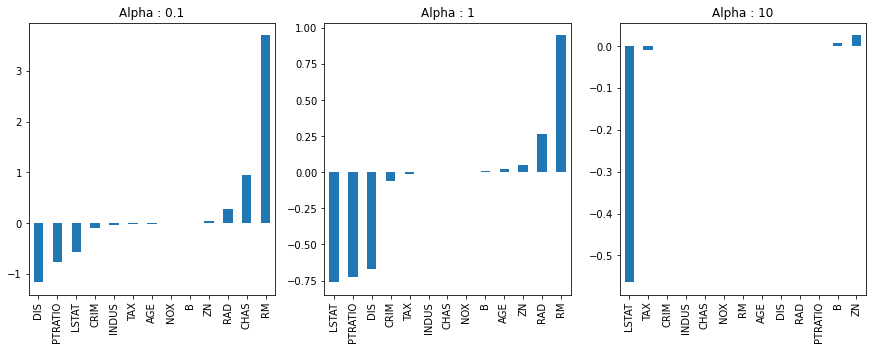

In [72]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
lasso01_coef.sort_values().plot(kind='bar')
plt.title('Alpha : 0.1')
plt.subplot(1, 3, 2)
lasso1_coef.sort_values().plot(kind='bar')
plt.title('Alpha : 1')
plt.subplot(1, 3, 3)
lasso10_coef.sort_values().plot(kind='bar')
plt.title('Alpha : 10')
plt.show()

# 회귀분석 성능평가척도

In [73]:
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge

boston = load_boston()

from sklearn.linear_model import Ridge
ridge = Ridge().fit(boston.data, boston.target)
pred = ridge.predict(boston.data)

from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as  mae


print(f"Mean Squared Error : {mse(boston.target, pred)}")
print(f"Mean Absolute Error : {mae(boston.target, pred)}")
print(f"Root Mean Squared Error : {mse(boston.target, pred)**0.5}")

Mean Squared Error : 22.044452243088195
Mean Absolute Error : 3.2645739551644377
Root Mean Squared Error : 4.695151993608747


# Logistic Regression

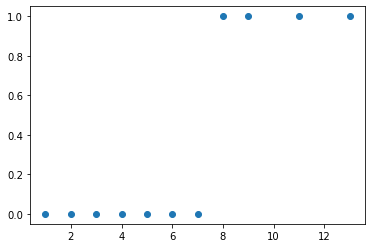

In [74]:
import numpy as np 
import matplotlib.pyplot as plt

x = np.array([1,2,3,4,5,6,7,8,9,11,13]) 
y = np.array([0,0,0,0,0,0,0,1,1,1,1]) 

plt.scatter(x, y)
plt.show()

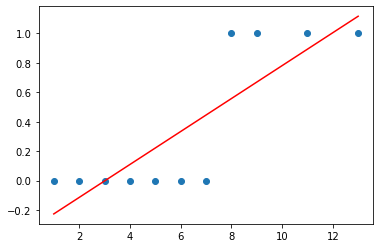

In [75]:
from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(x.reshape(-1, 1), y)
plt.scatter(x, y)
plt.plot(x, model.predict(x.reshape(-1, 1)), c='red')
plt.show()

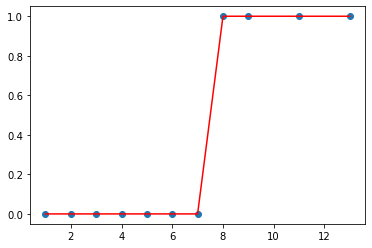

In [76]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression().fit(x.reshape(-1, 1), y)
plt.scatter(x, y)
plt.plot(x, model.predict(x.reshape(-1, 1)), c='red')
plt.show()

# 위스콘신 유방암 진단정보(이진분류)

In [77]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
cancer = load_breast_cancer()

x_train, x_test, y_train, y_test = train_test_split(cancer['data'],
                                                    cancer['target'],
                                                    stratify=cancer['target'],
                                                    random_state=0)
cancer['target_names']

array(['malignant', 'benign'], dtype='<U9')

In [84]:
cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

In [85]:
model = LogisticRegression(max_iter=10000).fit(x_train, y_train)
model.score(x_train, y_train), model.score(x_test, y_test)

(0.9671361502347418, 0.9370629370629371)

In [86]:
model.predict(x_test)[:5]

array([1, 0, 0, 1, 0])

In [87]:
model.predict_proba(x_test)[:5]

array([[1.40409907e-02, 9.85959009e-01],
       [9.99981913e-01, 1.80866699e-05],
       [9.99993794e-01, 6.20607489e-06],
       [4.39713666e-04, 9.99560286e-01],
       [9.99512429e-01, 4.87571208e-04]])

In [81]:
model.decision_function(x_test)[:5]

array([  4.25163382, -10.92031728, -11.98997572,   7.72894699,
        -7.62558652])

# 손글씨(다항분류)

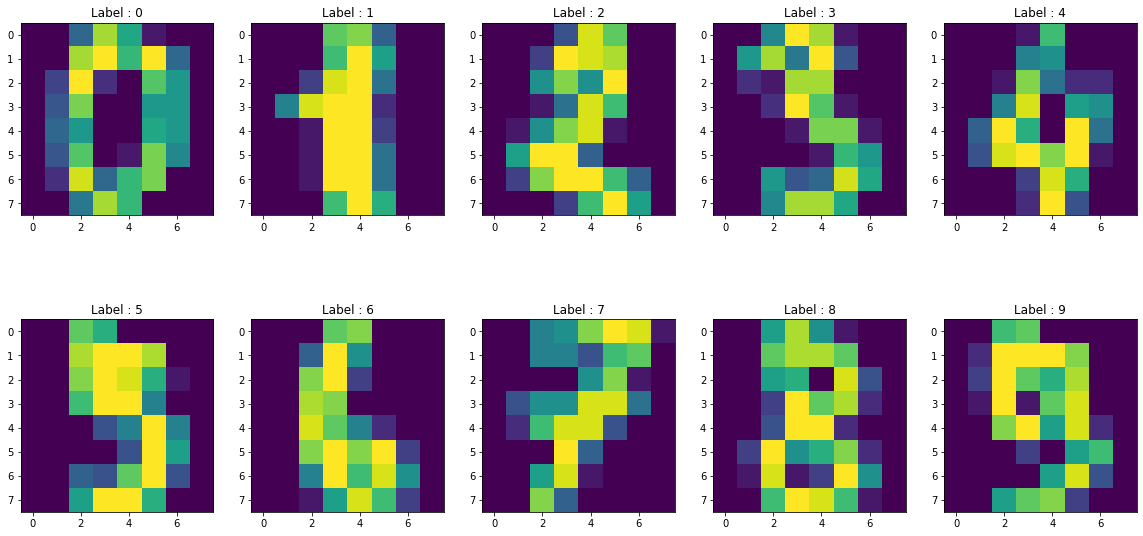

In [82]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
digits = load_digits()

plt.figure(figsize=(20, 10))
for index, image in enumerate(digits['images'][:10]):
    plt.subplot(2, 5, index+1)
    plt.imshow(image)
    plt.title(f'Label : {digits.target[index]}')
plt.show()

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(digits['data'],
                                                    digits['target'],
                                                    stratify=digits['target'],
                                                    random_state=0)

model = LogisticRegression(max_iter=10000).fit(x_train, y_train)
model.score(x_train, y_train), model.score(x_test, y_test)

In [ ]:
model.predict(x_test)[:2]

In [ ]:
model.predict_proba(x_test)[:2]

In [ ]:
# 데이터 세트 준비
from sklearn.datasets import load_linnerud


# 데이터 분할


# 모델 평가 ( 가장 좋은 Regression 모델을 찾아보세요.)

